In [1]:
#impored the required libraries
#for the data wrangling
import pandas as pd
import numpy as np

#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the required dataset
books=pd.read_csv("Books.csv")
users=pd.read_csv("Users main.csv")
ratings=pd.read_csv("Ratings.csv")

In [3]:
#taking look at dataset
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.shape

(271360, 8)

In [5]:
users.head(5)

,User-ID,City,State,Country,Age
0,1,nyc,new york,usa,NaN
1,2,stockton,california,usa,18.0
2,3,moscow,yukon territory,russia,NaN
3,4,porto,v.n.gaia,portugal,17.0
4,5,farnborough,hants,united kingdom,NaN


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
#shape of all the data set
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 5)
(1149780, 3)


### books data

In [8]:
print(books.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


in the books dataset there is some missing values

In [9]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [10]:
#books.isnull().sum()
print("Number of missing values: ",books.isnull().sum())

Number of missing values:  ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [11]:
#lets check the missing value percentage
print((books.isnull().sum()/len(books))*100)

ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000369
Year-Of-Publication    0.000000
Publisher              0.000737
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.001106
dtype: float64


so from above table we can get to know that in "book author" ,in "publisher" and also "image url" there are some missing values

In [12]:
#let check null values in book author very first
books[books["Book-Author"].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


#Larissa Anne Downes is the author of the book named "The Credit Suisse Guide to Managing Your Personal Wealth"

In [13]:
#filling the null values
books.loc[187689,'Book-Author']='Larissa Anne Downes'

In [14]:
#let check the null value in publisher
books[books["Publisher"].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


so from above df we can see for the book "tyrant moon " and "finders keepers" we have not publisher name...and thant we will find from internet

In [15]:
# tyrant moon - Mundania Press
# finders keepers - Hoodder & Stoughton

# let us replaicng null values with correct values
books.loc[128890,'Publisher']="Mundania Press"
books.loc[129037,'Publisher']="Hoodder & Stoughton"

In [16]:
#inspecting the value in year of publication
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

here is some wrong inputs are added like "0","2030","2050","2026","2038","DK Publishing Inc","Gallimard","1376","2037"

In [17]:
#correcting this year
books[books["Year-Of-Publication"]=="DK Publishing Inc"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [18]:
#078946697X
books.loc[books.ISBN=='078946697X',"Book-Title"]="DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
books.loc[books.ISBN=='078946697X',"Book-Author"]='Michael Teitelbaum'
books.loc[books.ISBN=='078946697X',"Year-Of-Publication"]=2000
books.loc[books.ISBN=='078946697X',"Publisher"]='DK Publishing Inc'

#0789466953
books.loc[books.ISBN=='0789466953',"Book-Title"]="DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
books.loc[books.ISBN=='0789466953',"Book-Author"]="James Buckley"
books.loc[books.ISBN=='0789466953',"Year-Of-Publication"]=2000
books.loc[books.ISBN=='0789466953',"Publisher"]="DK Publishing Inc"

In [19]:
#checking where year of publication is gallimard
books[books["Year-Of-Publication"]=="Gallimard"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [20]:
#iSBN=2070426769
books.loc[books.ISBN=='2070426769',"Book-Title"]="Peuple du ciel : suivi de Les bergers"
books.loc[books.ISBN=='2070426769',"Book-Author"]="Jean-Marie Gustave"
books.loc[books.ISBN=='2070426769',"Year-Of-Publication"]=2002
books.loc[books.ISBN=='2070426769',"Publisher"]="Paris : Gallimard"

In [21]:
#checking if the correction are in the place:

books.loc[books["ISBN"].isin(['078946697X','0789466953','2070426769'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,Peuple du ciel : suivi de Les bergers,Jean-Marie Gustave,2002,Paris : Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [22]:
#changing the data type of year publication
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [23]:
#something is out of publicaton periods we will find that 
books[(books["Year-Of-Publication"]>0) & (books["Year-Of-Publication"]<1800)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...


In [24]:
#iSBN=9643112136
books.loc[books.ISBN=='9643112136',"Year-Of-Publication"]=2010
#iSBN=964442011X
books.loc[books.ISBN=='964442011X',"Year-Of-Publication"]=1991

In [25]:
#let check for the year of publication after 2022
books.loc[(books['Year-Of-Publication'] > 2022) | (books['Year-Of-Publication'] == 0)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


there are 4621 rows which has year of publication is 0 or greater than 2022 for such huge amount of data we cant put all the exact correct values in the dataset so that we will replace all such incorrect year of publication with "median" values

In [26]:
#and we will replace NAN values with median value of year of publication
books['Year-Of-Publication'].fillna(books['Year-Of-Publication'].median(), inplace=True)

In [27]:
books["Book-Author"].value_counts()

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: Book-Author, Length: 102023, dtype: int64

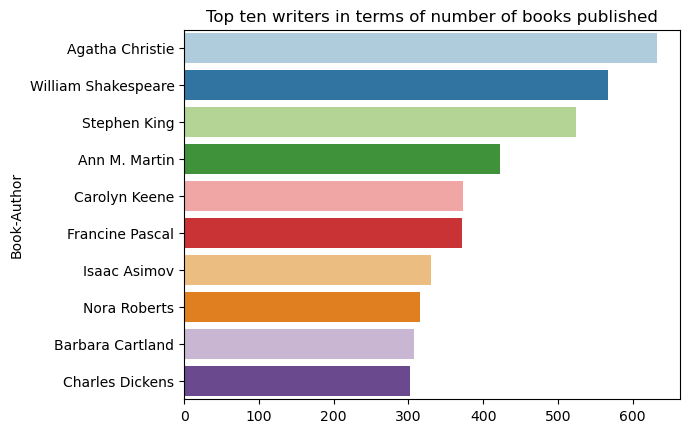

In [28]:
#Top 10 writers in terms of number of books published
popular_authors=books.groupby('Book-Author')['Book-Title'].count().nlargest(10)
sns.barplot(x=popular_authors.values,y=popular_authors.index,palette='Paired')
plt.title('Top ten writers in terms of number of books published')
plt.show()

In [29]:
books["Publisher"].value_counts()

Harlequin                  7535
Silhouette                 4220
Pocket                     3905
Ballantine Books           3783
Bantam Books               3646
                           ... 
Hannover House                1
Amber Quill Press, LLC.       1
Lunchbox Press                1
Ugly Town                     1
Connaught                     1
Name: Publisher, Length: 16807, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

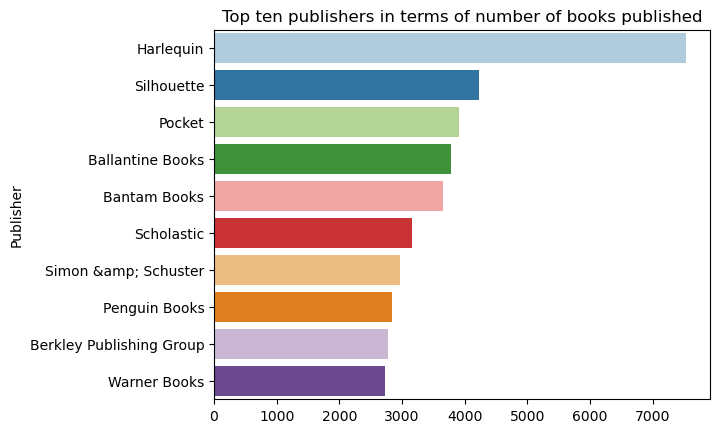

In [30]:
#Companies with the most number of books published
popular_publishers=books.groupby('Publisher')['Book-Title'].count().nlargest(10)
sns.barplot(x=popular_publishers.values,y=popular_publishers.index,palette='Paired')
plt.title('Top ten publishers in terms of number of books published')
plt.show

In [31]:
#inspecting the missing values in publisher columns
books["Publisher"].isnull().sum()

0

In [32]:
#uppercasing the ISBN Numebers
books["ISBN"]=books["ISBN"].str.upper()

though book and author is same we have different ISBN number assigned to it because of their revised edition

In [33]:
#checking for the duplicateed in books in column "book-Title" & "Book Author"
duplicate_rows=books[books.duplicated()]
duplicate_rows

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
6635,002542730X,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
11925,014062080X,The Scarlet Letter (Penguin Popular Classics),Nathaniel Hawthorne,1994,Penguin Books Ltd,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...
16298,097089726X,Jasper,Michelle Groce,2003,Novello Festival Press,http://images.amazon.com/images/P/097089726X.0...,http://images.amazon.com/images/P/097089726X.0...,http://images.amazon.com/images/P/097089726X.0...
19266,039592720X,Interpreter of Maladies,Jhumpa Lahiri,1999,Houghton Mifflin Co,http://images.amazon.com/images/P/039592720X.0...,http://images.amazon.com/images/P/039592720X.0...,http://images.amazon.com/images/P/039592720X.0...
22339,042512164X,Capital Crimes,Lawrence Sanders,2000,Berkley Publishing Group,http://images.amazon.com/images/P/042512164X.0...,http://images.amazon.com/images/P/042512164X.0...,http://images.amazon.com/images/P/042512164X.0...
...,...,...,...,...,...,...,...,...
267020,088404632X,Dianetics: The Modern Science of Mental Health,L. Ron Hubbard,1995,Bridge Publications (CA),http://images.amazon.com/images/P/088404632X.0...,http://images.amazon.com/images/P/088404632X.0...,http://images.amazon.com/images/P/088404632X.0...
269297,055215038X,The Sleeper,Gillian White,2003,Corgi Books,http://images.amazon.com/images/P/055215038X.0...,http://images.amazon.com/images/P/055215038X.0...,http://images.amazon.com/images/P/055215038X.0...
269552,037376099X,Patient Nurse (Man Of The Month) (Harlequin D...,Diana Palmer,1997,Silhouette,http://images.amazon.com/images/P/037376099X.0...,http://images.amazon.com/images/P/037376099X.0...,http://images.amazon.com/images/P/037376099X.0...
270285,189481505X,I-O,Simon Logan,2002,Prime (OH),http://images.amazon.com/images/P/189481505X.0...,http://images.amazon.com/images/P/189481505X.0...,http://images.amazon.com/images/P/189481505X.0...


In [34]:
# now we will drop the rows whose entire column values are repeated
books.drop_duplicates(keep="first",inplace=True)
books.reset_index(drop=True,inplace=True)

In [35]:
books['Book-Title'] = books['Book-Title'].str.replace('!', '')
books['Book-Title'] = books['Book-Title'].str.replace('@', '')
books['Book-Title'] = books['Book-Title'].str.replace('#', '')
books['Book-Title'] = books['Book-Title'].str.replace('$', '')
books['Book-Title'] = books['Book-Title'].str.replace('%', '')
books['Book-Title'] = books['Book-Title'].str.replace('^', '')
books['Book-Title'] = books['Book-Title'].str.replace('&', '')
books['Book-Title'] = books['Book-Title'].str.replace('*', '')
books['Book-Title'] = books['Book-Title'].str.replace('?', '')
books['Book-Title'] = books['Book-Title'].str.replace(';', '')
books['Book-Title'] = books['Book-Title'].str.replace('"', '')
books['Book-Title'] = books['Book-Title'].str.replace('/', '')
books['Book-Title'] = books['Book-Title'].str.replace('|', '')
books['Book-Title'] = books['Book-Title'].str.replace('{', '')
books['Book-Title'] = books['Book-Title'].str.replace('}', '')
books['Book-Title'] = books['Book-Title'].str.replace('[', '')                                                
books['Book-Title'] = books['Book-Title'].str.replace(']', '')
books['Book-Title'] = books['Book-Title'].str.replace('+', '')
books['Book-Title'] = books['Book-Title'].str.replace('=', '')
books['Book-Title'] = books['Book-Title'].str.replace('~', '')

In [36]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271047 entries, 0 to 271046
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271047 non-null  object
 1   Book-Title           271047 non-null  object
 2   Book-Author          271047 non-null  object
 3   Year-Of-Publication  271047 non-null  int32 
 4   Publisher            271047 non-null  object
 5   Image-URL-S          271047 non-null  object
 6   Image-URL-M          271047 non-null  object
 7   Image-URL-L          271044 non-null  object
dtypes: int32(1), object(7)
memory usage: 15.5+ MB


### Users data

In [37]:
users.head()

,User-ID,City,State,Country,Age
0,1,nyc,new york,usa,NaN
1,2,stockton,california,usa,18.0
2,3,moscow,yukon territory,russia,NaN
3,4,porto,v.n.gaia,portugal,17.0
4,5,farnborough,hants,united kingdom,NaN


In [38]:
users= users.drop(["City","State"], axis=1)

#user id is anonymized and kept hidden and map to intergers,demographic data like age location age is provided if available,otherwise these fields contatin null values

In [39]:
#let see the top 10 and bottom 10 rows of dataframe
pd.concat([users.head(10),users.tail(10)],axis=0)

,User-ID,Country,Age
0,1,usa,NaN
1,2,usa,18.0
2,3,russia,NaN
3,4,portugal,17.0
4,5,united kingdom,NaN
5,6,usa,61.0
6,7,usa,NaN
7,8,canada,NaN
8,9,usa,NaN
9,10,spain,26.0


In [40]:
#inspecting the column in the users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  278858 non-null  int64  
 1   Country  274247 non-null  object 
 2   Age      168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [41]:
#let check the duplicate values in the users
users[users.duplicated()].sum()

User-ID    0.0
Country    0.0
Age        0.0
dtype: float64

In [42]:
print((users.isnull().sum()/len(users))*100)

User-ID     0.000000
Country     1.653530
Age        39.719857
dtype: float64


In [43]:
#almost 40% of the age data is missing

In [44]:
users["Age"].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

#the maximum age in the age column is 244 which is certainly outllier

<AxesSubplot:xlabel='Age'>

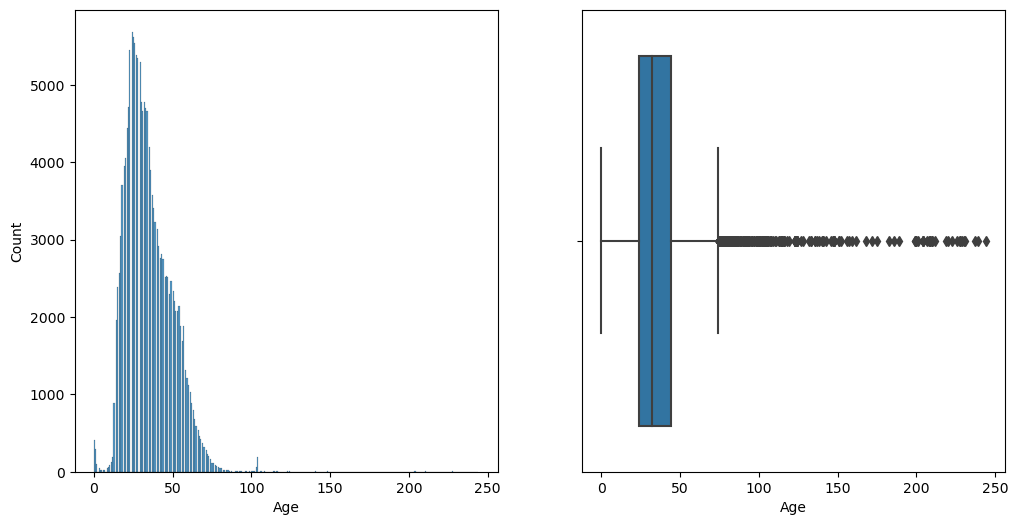

In [45]:
#let check the distribution of age with the help of histogram and boxplot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(x="Age",data=users)

plt.subplot(1,2,2)
sns.boxplot(x="Age",data=users)

It is highly unlikely to have users of age above 95 and below 4 in this case.Let's replace these values with np.nan

In [46]:
#replacing the outliers in the age column with NaN values
users.loc[(users["Age"]<4)|(users["Age"]>95),"Age"]=np.nan

In [47]:
#now again check the current number of missing values in age column
print("Number of missing values: ",users["Age"].isnull().sum())

Number of missing values:  112001


In [48]:
users.describe()

,User-ID,Age
count,278858.00000,166857.000000
mean,139429.50000,34.734222
std,80499.51502,13.621521
min,1.00000,4.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,95.000000


In [49]:
# let impute the the all NaN values with mean
users['Age'].fillna((users['Age'].mean()), inplace=True)

##Imputing such a large amount of null values will mean/mode/median will drastically change the distribution

In [50]:
#after imputation
users.Age.describe()

count    278858.000000
mean         34.734222
std          10.536727
min           4.000000
25%          29.000000
50%          34.734222
75%          35.000000
max          95.000000
Name: Age, dtype: float64

In [51]:
#let check with percentage of missing values in age column
users["Age"].isnull().sum()/len(users["Age"])*100

0.0

In [52]:
def age_group(age):
    #define the age group of users
    if age<13:
        x="children"
    elif age>=13 and age<=19:
        x="teens"
    elif age>19 and age<40:
        x="youth"
    elif age>=40 and age<60:
        x="middle adulthood"
    else:
        x="elder"
    return x

In [53]:
users["age_group"]=users["Age"].apply(lambda x : age_group(x))

<AxesSubplot:xlabel='age_group', ylabel='count'>

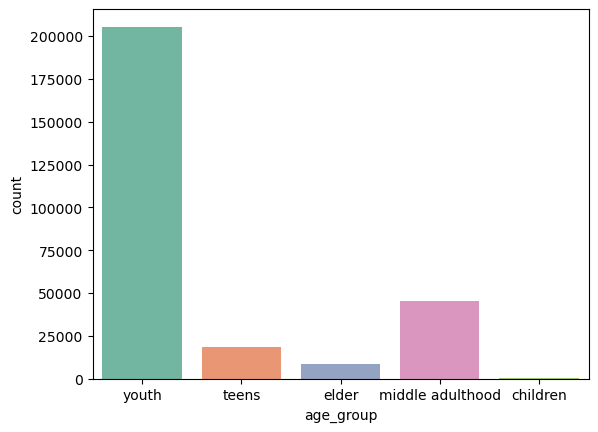

In [54]:
# let see the age distribution for the users
sns.countplot(users["age_group"],palette="Set2")

<AxesSubplot:xlabel='Age', ylabel='Density'>

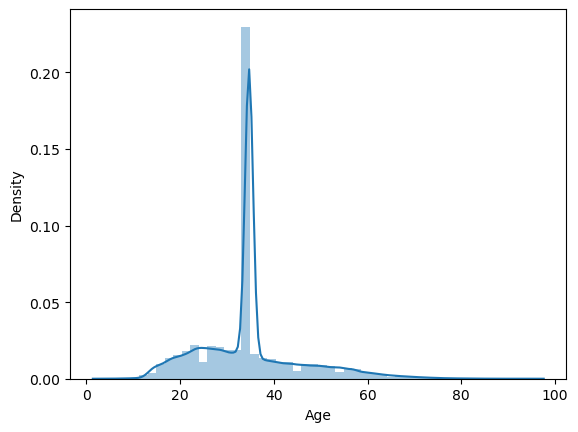

In [55]:
#Age distribution of users
age_df=users[users['User-ID'].isin(list(users['User-ID'].unique()))]
sns.distplot(age_df.Age)

In [56]:
#Converting the country names to uppercase
users['Country']=users['Country'].str.upper()

In [57]:
users.head()

,User-ID,Country,Age,age_group
0,1,USA,34.734222,youth
1,2,USA,18.000000,teens
2,3,RUSSIA,34.734222,youth
3,4,PORTUGAL,17.000000,teens
4,5,UNITED KINGDOM,34.734222,youth


In [58]:
users['Country'].fillna('UNKNOWN', inplace=True)

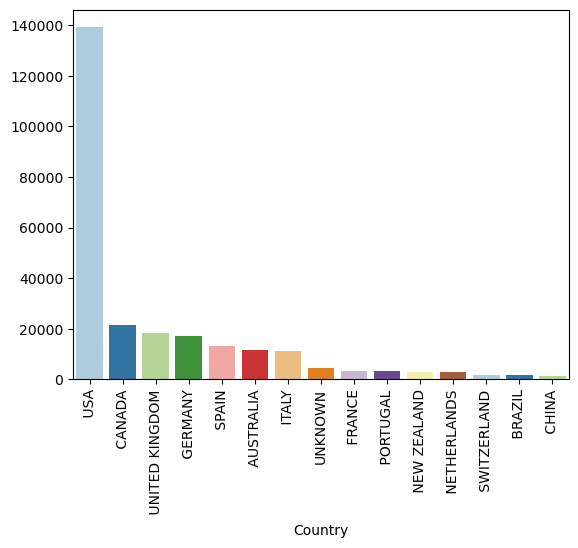

In [59]:
#Countries with maximum number of users
top10=users.groupby('Country')['User-ID'].nunique().nlargest(15)
sns.barplot(x=top10.index,y=top10.values,palette='Paired')
plt.xticks(rotation=90)
plt.show()

### rating data

In [60]:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [61]:
ratings.shape

(1149780, 3)

In [62]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [63]:
#check for the null values
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [64]:
#check for the unique userID and ISBN Values
ratings['User-ID'].nunique(), ratings['ISBN'].nunique()

(105283, 340556)

In [65]:
#number of unique userID 105283
#number of unique ratings 340556
#This means that many users are buying multiple books. Also some books are really famous and hence are bought by multiple users.

In [66]:
#let make the ISBN number upper case

In [67]:
ratings['ISBN'].apply(lambda x: x.upper())

0           034545104X
1           0155061224
2           0446520802
3           052165615X
4           0521795028
              ...     
1149775     1563526298
1149776     0679447156
1149777     0515107662
1149778     0590442449
1149779    05162443314
Name: ISBN, Length: 1149780, dtype: object

In [68]:
#let check for the duplicates
ratings[ratings.duplicated()].sum()

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

In [69]:
# lets see if all the books in rating_df are also in books_df
ratings_new = ratings[ratings['ISBN'].isin(books['ISBN'])]

In [70]:
print('Shape of ratings: {} and ratings_new: {}'.format(ratings.shape, ratings_new.shape))

Shape of ratings: (1149780, 3) and ratings_new: (1030617, 3)


In [71]:
#book ratings
ratings_new['Book-Rating'].value_counts().reset_index()

,index,Book-Rating
0,0,646974
1,8,91739
2,10,71194
3,7,66356
4,9,60754
5,5,45343
6,6,31673
7,4,7613
8,3,5117
9,2,2374


In [72]:
#most popular books
ratings_new.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
215608,0971880107,2502
38505,0316666343,1295
70686,0385504209,883
7325,0060928336,732
32311,0312195516,723
87235,044023722X,647
21293,0142001740,615
144784,067976402X,614
132908,0671027360,586
93670,0446672211,585


#here are the top 10 most popular books

#but this contains both explicit and implicit rating, so we need to seperate them to get better idea

In [73]:
explicit_rating = ratings_new[ratings_new['Book-Rating'] != 0]
implicit_rating = ratings_new[ratings_new['Book-Rating'] == 0]
print('Shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

Shape of explicit rating: (383643, 3) and implicit rating: (646974, 3)


In [74]:
# most purchased books including the implicitely rated books
ratings_new.groupby('ISBN')['User-ID'].count().reset_index().sort_values(by='User-ID', ascending=False)[:10]['ISBN'].values

array(['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211'], dtype=object)

In [75]:
## getting the book names corresponding to these ISBNs
isbn_nums = ['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211']
books[books['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
118,0671027360,Angels amp Demons,Dan Brown,2001,Pocket Star,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...
305,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...
356,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
706,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
748,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
1922,067976402X,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...


In [76]:
# most popular explicitely rated books
explicit_rating.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
21915,0316666343,707
117593,0971880107,581
38771,0385504209,487
18032,0312195516,383
4122,0060928336,320
68795,059035342X,313
12303,0142001740,307
51715,0446672211,295
47910,044023722X,281
57539,0452282152,278


<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

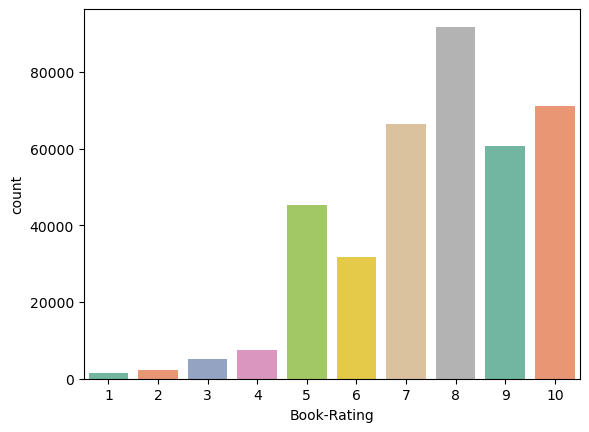

In [77]:
#Rating distribution for explicit rating
sns.countplot(x='Book-Rating',data=explicit_rating,palette='Set2')

### Merging the dataset

In [78]:
# for the rating dataset, we are only taking the explicit rating dataset

books_ratings= pd.merge(books, explicit_rating, on='ISBN', how='inner')
df = pd.merge(books_ratings, users, on='User-ID', how='inner')

In [79]:
#shape of the merged dataframe 'df'
df.shape

(383693, 13)

In [80]:
#displaying the top 3 rows of df
df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Country,Age,age_group
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,CANADA,34.734222,youth
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,8,5,CANADA,34.734222,youth
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,8,5,CANADA,34.734222,youth


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383693 entries, 0 to 383692
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 383693 non-null  object 
 1   Book-Title           383693 non-null  object 
 2   Book-Author          383693 non-null  object 
 3   Year-Of-Publication  383693 non-null  int32  
 4   Publisher            383693 non-null  object 
 5   Image-URL-S          383693 non-null  object 
 6   Image-URL-M          383693 non-null  object 
 7   Image-URL-L          383692 non-null  object 
 8   User-ID              383693 non-null  int64  
 9   Book-Rating          383693 non-null  int64  
 10  Country              383693 non-null  object 
 11  Age                  383693 non-null  float64
 12  age_group            383693 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(9)
memory usage: 39.5+ MB


In [82]:
#Number of users who have rated the books
df['User-ID'].nunique()

68080

In [83]:
#Number of books in the dataframe
df['ISBN'].nunique()

149655

### Exploratory Data Analysis

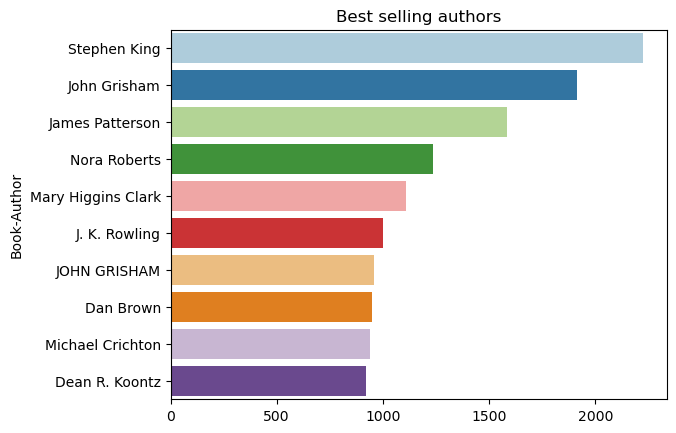

In [84]:
#Best selling authors
best_selling_authors=df.groupby('Book-Author')['User-ID'].nunique().nlargest(10)
sns.barplot(x=best_selling_authors.values,y=best_selling_authors.index,palette='Paired')
plt.title('Best selling authors')
plt.show()

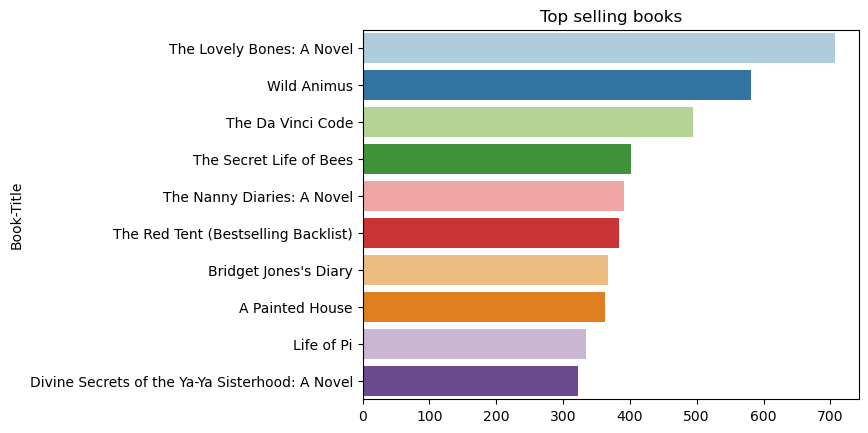

In [85]:
#Top selling books 
most_purchased_books=df.groupby('Book-Title')['User-ID'].nunique().nlargest(10)
sns.barplot(x=most_purchased_books.values,y=most_purchased_books.index,palette='Paired')
plt.title('Top selling books')
plt.show()

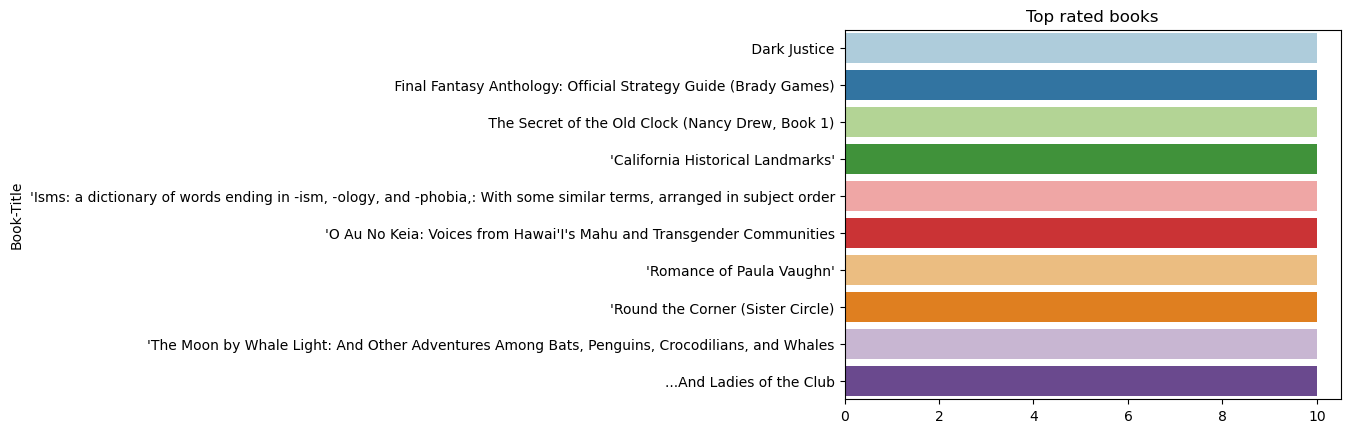

In [86]:
#Top-rated books
top_rated_books=df.groupby('Book-Title')['Book-Rating'].mean().nlargest(10)
sns.barplot(x=top_rated_books.values,y=top_rated_books.index,palette='Paired')
plt.title('Top rated books')
plt.show()

### books having highest average ratings (with a minimum of at least 250 ratings recieved)

In [87]:
num_rating_df=df.groupby('Book-Title').count()["Book-Rating"].reset_index()
num_rating_df.rename(columns={"Book-Rating":"num_rating"},inplace=True)
num_rating_df

,Book-Title,num_rating
0,(A Nutshell handbook),1
1,A Light in the Storm: The Civil War Diary of ...,1
2,"Ask Lily (Young Women of Faith: Lily Series, ...",1
3,Dark Justice,1
4,Earth Prayers From around the World: 365 Pray...,7
...,...,...
135449,ÃÂbernachten mit Stil. Die schÃÂ¶nsten Country...,1
135450,ÃÂrger mit Produkt X. Roman.,3
135451,ÃÂsterlich leben.,1
135452,ÃÂstlich der Berge.,1


In [88]:
avg_rating_df=df.groupby('Book-Title').mean()["Book-Rating"].reset_index()
avg_rating_df.rename(columns={"Book-Rating":"avg_rating"},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,(A Nutshell handbook),6.000000
1,A Light in the Storm: The Civil War Diary of ...,9.000000
2,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
3,Dark Justice,10.000000
4,Earth Prayers From around the World: 365 Pray...,7.142857
...,...,...
135449,ÃÂbernachten mit Stil. Die schÃÂ¶nsten Country...,8.000000
135450,ÃÂrger mit Produkt X. Roman.,7.000000
135451,ÃÂsterlich leben.,7.000000
135452,ÃÂstlich der Berge.,8.000000


In [89]:
popular_df=num_rating_df.merge(avg_rating_df,on="Book-Title")
popular_df

,Book-Title,num_rating,avg_rating
0,(A Nutshell handbook),1,6.000000
1,A Light in the Storm: The Civil War Diary of ...,1,9.000000
2,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
3,Dark Justice,1,10.000000
4,Earth Prayers From around the World: 365 Pray...,7,7.142857
...,...,...,...
135449,ÃÂbernachten mit Stil. Die schÃÂ¶nsten Country...,1,8.000000
135450,ÃÂrger mit Produkt X. Roman.,3,7.000000
135451,ÃÂsterlich leben.,1,7.000000
135452,ÃÂstlich der Berge.,1,8.000000


In [90]:
# Top 10 highly rated books
popupar_df=popular_df[popular_df["num_rating"]>250].sort_values("avg_rating",ascending=False).head(10)
popupar_df

,Book-Title,num_rating,avg_rating
45359,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321
123586,To Kill a Mockingbird,267,8.977528
45369,Harry Potter and the Sorcerer's Stone (Harry P...,313,8.939297
45340,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491
116106,The Secret Life of Bees,406,8.477833
102619,The Da Vinci Code,494,8.439271
110144,The Lovely Bones: A Novel,707,8.185290
114870,The Red Tent (Bestselling Backlist),383,8.182768
131234,Where the Heart Is (Oprah's Book Club (Paperba...,295,8.142373
60637,Life of Pi,336,8.080357


### Listing the books which are prefered by the countries

In [91]:
country_pref=pd.DataFrame(df.groupby(['Country'])['Book-Title'].value_counts()).rename(columns={'Book-Title':'count'}).sort_values(by='count', ascending=False)
country_pref=country_pref.reset_index()
country_pref

,Country,Book-Title,count
0,USA,The Lovely Bones: A Novel,531
1,USA,The Da Vinci Code,396
2,USA,The Secret Life of Bees,360
3,USA,The Nanny Diaries: A Novel,321
4,USA,A Painted House,309
...,...,...,...
183987,NETHERLANDS,Endangered Species (Anna Pigeon Mysteries (Pap...,1
183988,NETHERLANDS,En wat gebeurt en dan met mij: Kinderen over e...,1
183989,NETHERLANDS,En dan zou jij zeggen,1
183990,NETHERLANDS,Empty Promises,1


In [92]:
# we will merge the country_pref and avg_rating_df
rated_country_df=country_pref.merge(avg_rating_df,on="Book-Title")
rated_country_df

,Country,Book-Title,count,avg_rating
0,USA,The Lovely Bones: A Novel,531,8.18529
1,CANADA,The Lovely Bones: A Novel,62,8.18529
2,UNKNOWN,The Lovely Bones: A Novel,41,8.18529
3,UNITED KINGDOM,The Lovely Bones: A Novel,14,8.18529
4,AUSTRALIA,The Lovely Bones: A Novel,11,8.18529
...,...,...,...,...
183987,NETHERLANDS,FEEL FREE,1,7.00000
183988,NETHERLANDS,Evolve : Succeeding in the Digital Culture of ...,1,7.00000
183989,NETHERLANDS,Envoy from Mirror City: An Autobiography (Envo...,1,9.00000
183990,NETHERLANDS,England Their England (Picador Books),1,8.00000


### Listing the author names which are prefered by the countries

In [93]:
pd.DataFrame(df.groupby(['Country'])['Book-Author'].value_counts()).rename(columns={'Book-Author':'count'}).sort_values(by='count', ascending=False).reset_index()

,Country,Book-Author,count
0,USA,Stephen King,3321
1,USA,Nora Roberts,2437
2,USA,James Patterson,1918
3,USA,John Grisham,1836
4,USA,J. K. Rowling,1340
...,...,...,...
100904,NETHERLANDS,Margaret Dickinson,1
100905,NETHERLANDS,Marcelle Clements,1
100906,NETHERLANDS,Marc Levy,1
100907,NETHERLANDS,Marc Behm,1


### Most read book in Top-10 book reading countries

In [94]:
#Creating List of top-10 country by book readers count
top_10_countries = df['Country'].value_counts().nlargest(10).index

#Grouping by Country and Creating dataframe for each 
grouped_dataframes = {}
for country in top_10_countries:
    grouped_dataframes[country] = df[df['Country'] == country]
    grouped_dataframes[country].reset_index(inplace=True)
    grouped_dataframes[country]['Age'].astype(int)

#Creating list of most read book for each country
book_most={}
for i in top_10_countries:
    book_most[i]=grouped_dataframes[i]['Book-Title'].value_counts().nlargest(1).index

In [95]:
for i in top_10_countries:
    print("Most read Book in ",i,' country is ',book_most[i][0],'\n')

Most read Book in   USA  country is  The Lovely Bones: A Novel 

Most read Book in   CANADA  country is  The Lovely Bones: A Novel 

Most read Book in   UNITED KINGDOM  country is  Bridget Jones's Diary 

Most read Book in   GERMANY  country is  Russendisko. 

Most read Book in  UNKNOWN  country is  The Lovely Bones: A Novel 

Most read Book in   SPAIN  country is  El Hobbit 

Most read Book in   AUSTRALIA  country is  Wild Animus 

Most read Book in   N/A  country is  Pet Sematary 

Most read Book in   FRANCE  country is  Je Voudrais Que Quelqu'un M'Attende Quelque Part 

Most read Book in   PORTUGAL  country is  Coraline 



### Top rated book in Top-10 book reading countries

In [96]:
#Majority top reading country have same book. Enter country name of top_10_countries list and Verify value_counts of each book
grouped_dataframes[' USA']['Book-Title'].value_counts()

The Lovely Bones: A Novel                                                                             531
The Da Vinci Code                                                                                     396
The Secret Life of Bees                                                                               360
The Nanny Diaries: A Novel                                                                            321
A Painted House                                                                                       309
                                                                                                     ... 
Cato Wahl                                                                                               1
Daughters of the Desert: Stories of Remarkable Women from Christian, Jewish, and Muslim Traditions      1
Boss, The Beauty, And The Bargain (Harlequin Silhouette Desire, No 1122)                                1
His Trophy Mistress (Presents, 2249)          

In [97]:
book_ratings={}
for i in top_10_countries:
    #Create Dataframe with average rating received by each book in specific country dataframe
    book_ratings[i] = grouped_dataframes[i].groupby('Book-Title')['Book-Rating'].mean().reset_index() 
    book_ratings[i].sort_values('Book-Rating') #Sort new create dataframe by rating

In [98]:
for i in top_10_countries:
    print("Highest rated Book in ",i,' country is ',book_ratings[i]['Book-Title'][0],'\n')

Highest rated Book in   USA  country is   (A Nutshell handbook) 

Highest rated Book in   CANADA  country is   Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17) 

Highest rated Book in   UNITED KINGDOM  country is   Travel Companion Chile and Easter Island (Travel Companion) 

Highest rated Book in   GERMANY  country is  ' Mein verwundetes Herz'. Das Leben der Lilli Jahn 1900 - 1944. 

Highest rated Book in  UNKNOWN  country is  1,911 Best Things Anybody Ever Said 

Highest rated Book in   SPAIN  country is  --Olivetti, Moulinex, Chaffoteaux et Maury (Quaderns crema. Narrativa) 

Highest rated Book in   AUSTRALIA  country is  ' Allo 'Allo: the War Diaries of Rene Artois 

Highest rated Book in   N/A  country is  'Eine gute Frau hat keinen Kopf'. EuropÃÂ¤ische SprichwÃÂ¶rter ÃÂ¼ber Frauen. 

Highest rated Book in   FRANCE  country is  101 expÃÂ©riences de philosophie quotidienne 

Highest rated Book in   PORTUGAL  country is  'Salem's Lot 



### Most read book by Age-Group in each country(Top-10 book reading countries)

In [99]:
'''Grouping Demography by Age
children = 0 to 12
teen=13 to 19
youth=20 to 40
Middle adulthood = 40 to 60
elderly = 60 to 80'''

for i in top_10_countries:
    grouped_dataframes[i]['age_group'] = np.select(
        [grouped_dataframes[i]['Age'] < 12, (grouped_dataframes[i]['Age'] >= 13) & (grouped_dataframes[i]['Age'] <= 19),(grouped_dataframes[i]['Age'] >20) & (grouped_dataframes[i]['Age'] <= 40),(grouped_dataframes[i]['Age'] > 40) & (grouped_dataframes[i]['Age'] <= 60),grouped_dataframes[i]['Age'] > 60], 
        ['Children', 'Teen', 'youth','Middle Adulthood','elder'], default=None)

In [100]:
df_grouped_Age={}
for i in top_10_countries:
    df_grouped_Age[i] = grouped_dataframes[i].groupby('age_group')

In [101]:
for i in top_10_countries:
    print("Most read book by age_group in ",i,'is')
    print(df_grouped_Age[i]['Book-Title'].agg(pd.Series.mode),'\n\n')

Most read book by age_group in   USA is
age_group
Children            [Harry Potter and the Sorcerer's Stone (Harry ...
Middle Adulthood                                    The Da Vinci Code
Teen                  [The Catcher in the Rye, To Kill a Mockingbird]
elder                                               The Da Vinci Code
youth                                       The Lovely Bones: A Novel
Name: Book-Title, dtype: object 


Most read book by age_group in   CANADA is
age_group
Children            [Artemis Fowl (Artemis Fowl, Book 1), Captain ...
Middle Adulthood                            The Lovely Bones: A Novel
Teen                                           The Catcher in the Rye
elder               [A Prayer for Owen Meany, A Time to Kill, Ange...
youth                                       The Lovely Bones: A Novel
Name: Book-Title, dtype: object 


Most read book by age_group in   UNITED KINGDOM is
age_group
Children                              The Secret Life of Sally Tom

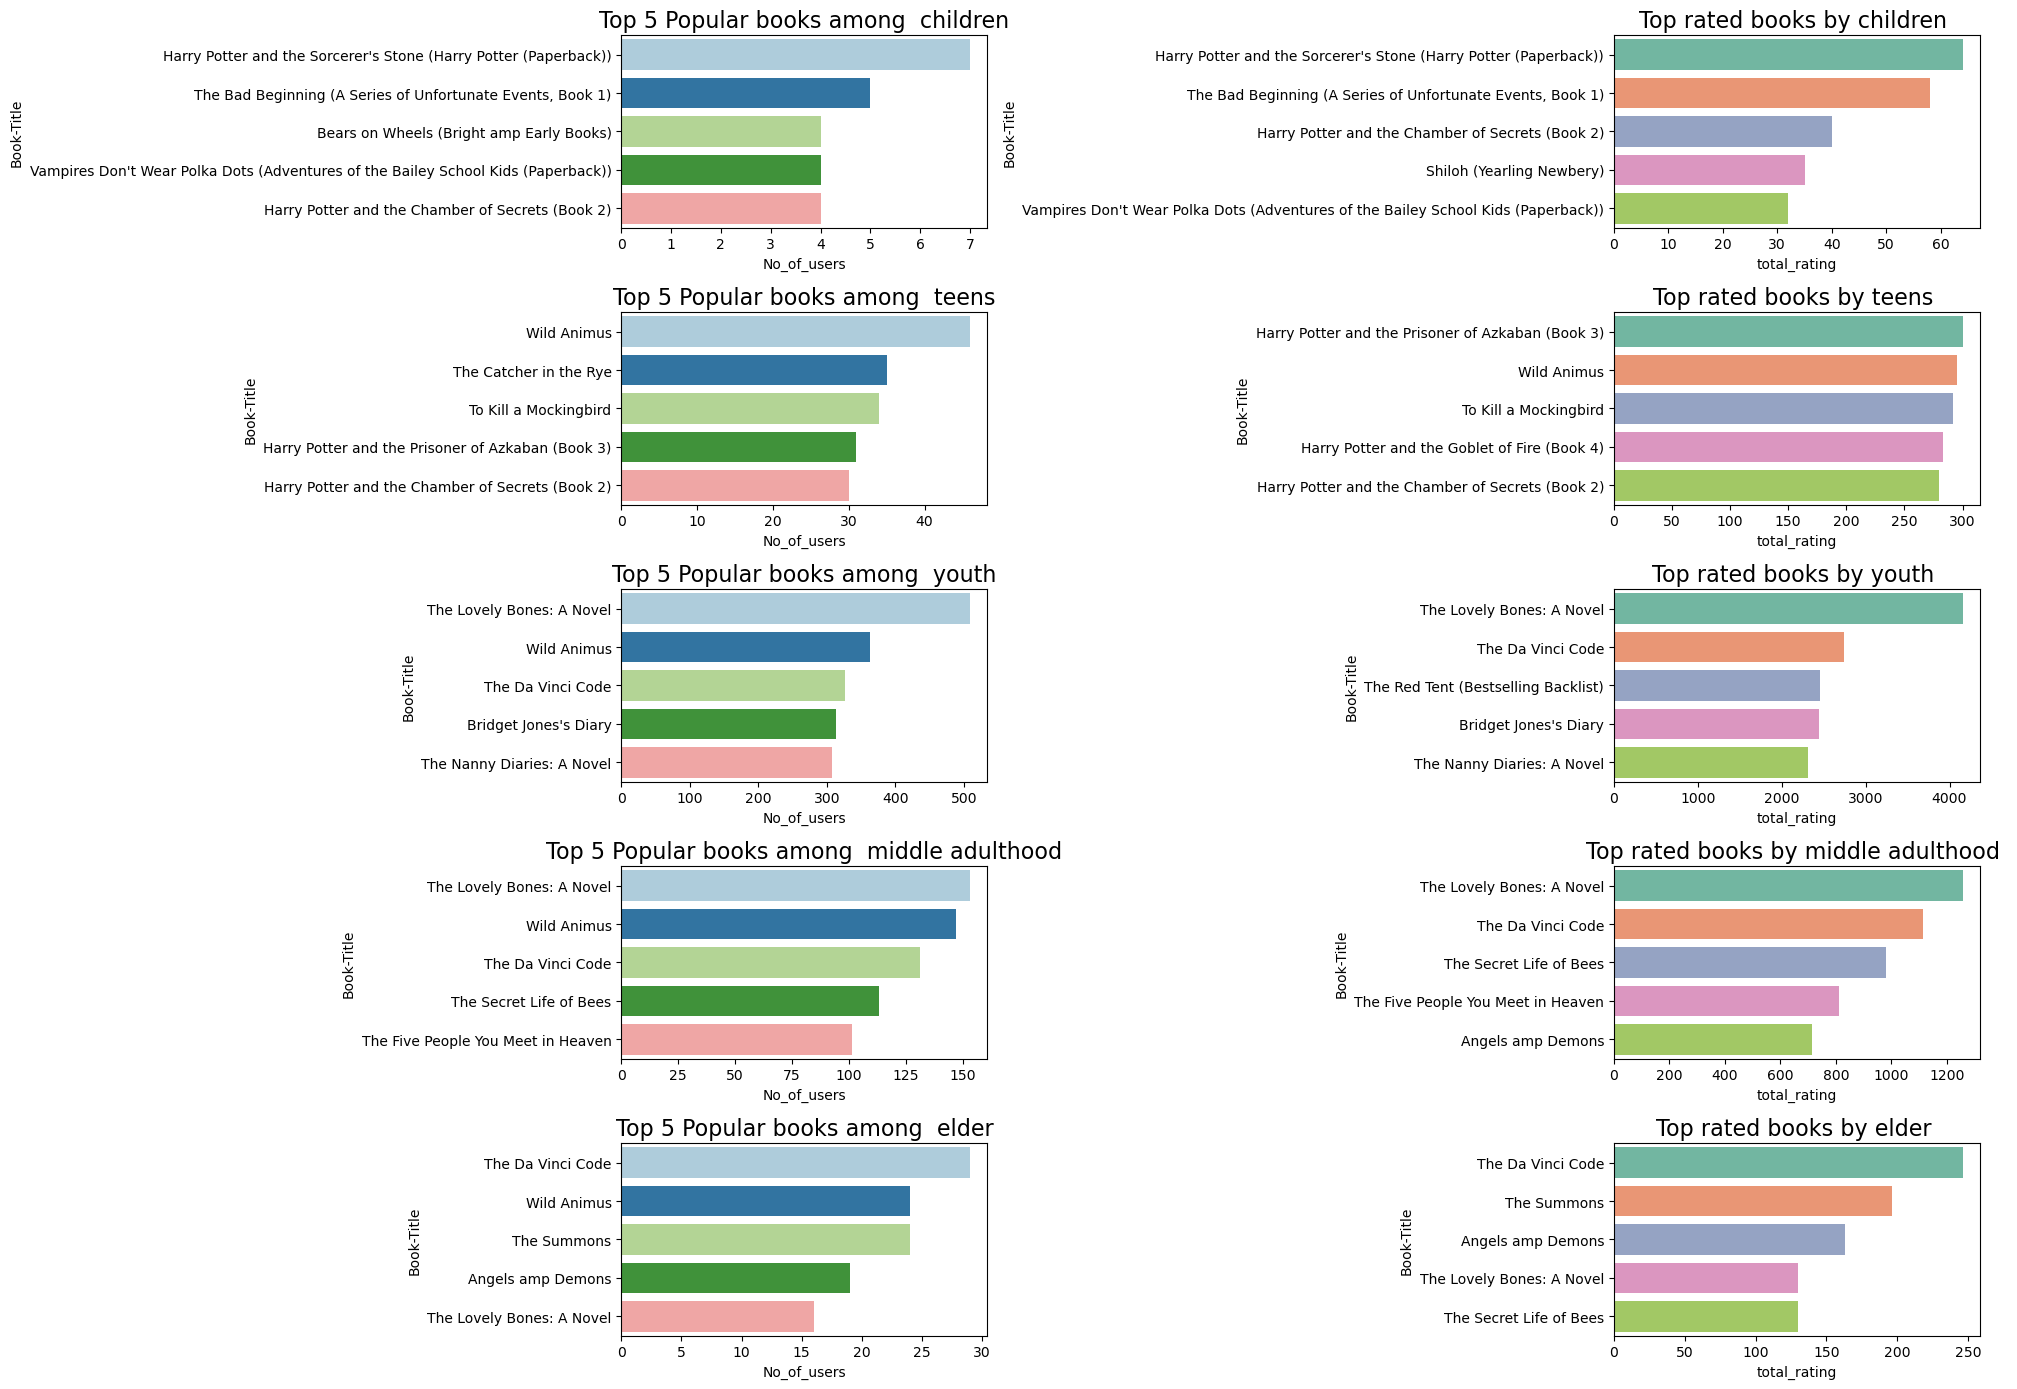

In [102]:
fig=plt.figure(figsize=(20,14))
i=1
for group  in ['children','teens','youth','middle adulthood','elder']:
  age_df=df.loc[df['age_group']==group].groupby(['Book-Title']).agg(No_of_users=('User-ID','nunique'),total_rating=('Book-Rating','sum')).reset_index() 
  plt.subplot(5,2,i)
  age_df.sort_values(by='No_of_users',ascending=False,inplace=True)
  sns.barplot(x='No_of_users',y='Book-Title',palette='Paired',data=age_df.head(5))
  plt.title('Top 5 Popular books among  {}'.format(group),size=16)
  i+=1
  plt.subplot(5,2,i)
  age_df.sort_values(by='total_rating',ascending=False,inplace=True)
  sns.barplot(x='total_rating',y='Book-Title',palette='Set2',data=age_df.head(5))
  plt.title('Top rated books by {} '.format(group),size=16)
  i+=1
  
plt.tight_layout()

## Model Building

### Popularity based Recommendation System(General Recommendation)

In [103]:
popularity_model=num_rating_df.merge(avg_rating_df,on="Book-Title")
# we will consider only those group whose rating is greater than 200
popularity_model=popularity_model[popularity_model['num_rating']>=200].sort_values('avg_rating',ascending=False).head(50)
popularity_model=popularity_model.merge(books,on="Book-Title").drop_duplicates('Book-Title')[["Book-Title","Book-Author","Image-URL-M","num_rating","avg_rating"]]
popularity_model.head()

,Book-Title,Book-Author,Image-URL-M,num_rating,avg_rating
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,247,9.125506
2,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,277,9.043321
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,210,9.042857
8,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,267,8.977528
16,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,313,8.939297


In [104]:
popularity_model.shape

(50, 5)

### User based Model

In [105]:
# taking only needed columns
dfs=df.drop(["Country","Age",'age_group','Image-URL-S','Image-URL-L'], axis=1).rename(columns={"User-ID":"user_id","Book-Rating":"rating"})
dfs.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,user_id,rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,8,5
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,8,5
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.0...,8,5
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,8,6


In [106]:
user_model=num_rating_df.merge(avg_rating_df,on="Book-Title")
# selecting books having no of ratings greater than 100
user_model.sort_values(by='num_rating', ascending=False).head()
user_model= user_model[user_model['num_rating'] >= 250]
user_models=dfs.merge(user_model, on='Book-Title', how='inner').drop_duplicates(['Book-Title','user_id']).sort_index().drop(['num_rating','avg_rating'],axis=1)
user_models_1=user_models.groupby('user_id').count()["rating"].reset_index().sort_values(by='rating',ascending=False)
user_models_1=user_models_1[user_models_1['rating'] >= 3].merge(user_models, on='user_id', how='inner').drop(['rating_x'],axis=1).rename(columns={'rating_y':'rating'})

### Recommendations

In [107]:
def recommend(target_user):
    user_books=user_models[user_models['user_id']==target_user]
    new_user=user_books[['user_id', 'Book-Title', 'rating']]
    other_user = user_models[user_models['Book-Title'].isin(new_user['Book-Title'].values)]
    other_users=other_user[other_user['user_id'] != target_user].drop(["Year-Of-Publication",'ISBN','Publisher','Image-URL-M','Book-Author'], axis=1)
    users_mutual_books = other_users.groupby('user_id')
    top_users = sorted(users_mutual_books, key=lambda x: len(x[1]), reverse=True)[:50]
    
    from scipy.stats import pearsonr
    pearson_corr = {}
    for user_id, book_s in top_users:
        # Books should be sorted
        books_new = book_s.sort_values(by='user_id')
        book_list = books_new['Book-Title'].values

        new_user_ratings = new_user[new_user['Book-Title'].isin(book_list)]['rating'].values 
        user_ratings = books_new[books_new['Book-Title'].isin(book_list)]['rating'].values

        corr = pearsonr(new_user_ratings, user_ratings)
        pearson_corr[user_id] = corr[0]
    pearson_df = pd.DataFrame(columns=['user_id', 'similarity_index'], data=pearson_corr.items())
    pearson_df = pearson_df.sort_values(by='similarity_index', ascending=False)[:5]
    users_rating = pearson_df.merge(user_models, on='user_id', how='inner')
    users_rating['weighted_rating'] = users_rating['rating'] * users_rating['similarity_index']

    #removing books that already read by target
    users_ratings = users_rating.merge(new_user, how="left", on=["Book-Title"], indicator=True)
    users_ratings=users_ratings[users_ratings['_merge']=='left_only'].drop(['user_id_y', 'rating_y','_merge'],
                            axis=1).rename(columns={"user_id_x":"user_id",'rating_x':"rating"})
    grouped_ratings = users_ratings.groupby('Book-Title').sum()[['similarity_index', 'weighted_rating']]
    recommend_books = pd.DataFrame()

    # Add average recommendation score
    recommend_books['avg_reccomend_score'] = grouped_ratings['weighted_rating']/grouped_ratings['similarity_index']
    recommend_books['Book-Title'] = grouped_ratings.index
    recommend_books = recommend_books.reset_index(drop=True).drop_duplicates('Book-Title')
    recommend_books = recommend_books.merge(user_models,on='Book-Title',how='inner').drop(['ISBN', 'Year-Of-Publication', 'Publisher'], axis=1)

    # Left books with the highest 10 score
    recommend_books = recommend_books[(recommend_books['avg_reccomend_score'] >= 1)].drop_duplicates('Book-Title').sort_values(by='avg_reccomend_score', 
                                                                                                 ascending=False).head(10)
    return recommend_books

In [108]:
recommend(204864)

,avg_reccomend_score,Book-Title,Book-Author,Image-URL-M,user_id,rating
729,10.0,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,11676,10
362,9.0,Bridget Jones's Diary,Helen Fielding,http://images.amazon.com/images/P/014028009X.0...,11676,8
1433,9.0,The Secret Life of Bees,Sue Monk Kidd,http://images.amazon.com/images/P/0670894605.0...,11676,10
1042,8.0,The Nanny Diaries: A Novel,Emma McLaughlin,http://images.amazon.com/images/P/0312278586.0...,11676,6
2143,7.0,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0060935464.0...,11676,10
0,6.0,A Painted House,John Grisham,http://images.amazon.com/images/P/044023722X.0...,11676,8
1835,6.0,The Summons,John Grisham,http://images.amazon.com/images/P/0440241073.0...,11676,8


In [109]:
import pickle

In [110]:
pickle.dump(user_models_1,open('user_model.pkl','wb'))

In [111]:
pickle.dump(popularity_model,open('popular.pkl','wb'))